In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

---

# 1. 데이터 이해

In [2]:
df = pd.read_csv('../../data/customer_hm.csv')
df.shape

(1048575, 6)

In [3]:
print('# 컬럼명')
print(df.columns)
print('-----------'*5)
print('# 데이터 타입 및 결측지')
print(df.info())

# 컬럼명
Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age'],
      dtype='str')
-------------------------------------------------------
# 데이터 타입 및 결측지
<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1048575 non-null  str  
 1   FN                      1048575 non-null  int64
 2   Active                  1048575 non-null  int64
 3   club_member_status      1048575 non-null  str  
 4   fashion_news_frequency  1048574 non-null  str  
 5   age                     1048575 non-null  int64
dtypes: int64(3), str(3)
memory usage: 48.0 MB
None


In [4]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


In [5]:
for col in df.columns:
    if col not in ['customer_id', 'age']:
        print(f"\n{col}")
        print(df[col].unique())


FN
[0 1]

Active
[0 1]

club_member_status
<StringArray>
['ACTIVE', 'PRE-CREATE', 'LEFT CLUB']
Length: 3, dtype: str

fashion_news_frequency
<StringArray>
['NONE', 'Regularly', 'Monthly', nan]
Length: 4, dtype: str


In [6]:
df.duplicated().sum()

np.int64(0)

## →
- 행: 1048575
- 열: 6
- customers_hm 컬럼 설명
    - `customer_id`: 고객 id
    - `FN`: 패션 뉴스 구독 여부
    - `Active`: 커뮤니케이션 가능 여부
    - `club_member_status`: 회원 상태(신규, 활성, 탈퇴)
    - `fashion_news_frequency`: 패션 뉴스 알림 주기
    - `age`: 나이
- `fashion_news_frequency` 컬럼 결측치 1개

<br>

Next
- `Active` 컬럼은 뭐지?
    - `Active`와 `fashon_new_frequency`의 관계 확인

---

# 2. 데이터 전처리

## 2-1. 결측치 처리

### 2-1-1. 결측치 확인

In [7]:
df.isna().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64

In [8]:
# 빈 문자열 및 문자열로 된 빈 값 확인
print((df == '').sum())
print('----------'*5)
print(df.isin(['None', 'NULL', 'null']).sum())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64
--------------------------------------------------
customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64


In [9]:
df[df.isnull().any(axis=1)]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
876108,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1,0,ACTIVE,NaN,38


### 2-1-2. 결측치 처리

In [10]:
df[(df['FN'] == 1) & (df['Active'] == 0)
][['FN', 'Active', 'club_member_status', 'fashion_news_frequency']]

,FN,Active,club_member_status,fashion_news_frequency
133,1,0,ACTIVE,Regularly
241,1,0,ACTIVE,Regularly
326,1,0,ACTIVE,NONE
426,1,0,ACTIVE,Regularly
466,1,0,ACTIVE,Regularly
...,...,...,...,...
1048188,1,0,ACTIVE,Regularly
1048217,1,0,ACTIVE,Regularly
1048266,1,0,ACTIVE,Regularly
1048294,1,0,ACTIVE,Regularly


In [11]:
df[(df['FN'] == 1) & (df['Active'] == 0)
]['fashion_news_frequency'].value_counts(dropna=False)

fashion_news_frequency
Regularly    9598
NONE          238
Monthly        27
NaN             1
Name: count, dtype: int64

In [12]:
df_clean = df.copy()

df_clean.loc[876108, 'fashion_news_frequency'] = 'Regularly'
df_clean.loc[876108]

customer_id               a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...
FN                                                                        1
Active                                                                    0
club_member_status                                                   ACTIVE
fashion_news_frequency                                            Regularly
age                                                                      38
Name: 876108, dtype: object

→ <br>
`FN`: 1 이고 `Active`: 0 인 데이터 중에서 `fashion_news_frequency`의 최빈값이 `Regularly`로 확인되어, `fashion_news_frequency`에 결측치가 존재하는 인덱스 번호 `876108`의 `fashion_news_frequency` 값을 `Regularly`로 수정


---

# 2-2. 문자형 데이터 매핑

In [13]:
status_map = {'ACTIVE': 2, 'PRE-CREATE': 1, 'LEFT CLUB': 0}
frequency_map = {'Regularly': 2, 'Monthly': 1, 'NONE': 0}

df_clean['club_member_status'] = df_clean['club_member_status'].map(status_map)
df_clean['fashion_news_frequency'] = df_clean['fashion_news_frequency'].map(frequency_map)

In [20]:
print(df_clean['club_member_status'].value_counts(dropna=False))
print()
print(df_clean['fashion_news_frequency'].value_counts(dropna=False))

club_member_status
2    982635
1     65581
0       359
Name: count, dtype: int64

fashion_news_frequency
0    674698
2    373219
1       658
Name: count, dtype: int64


---

## 2-3. 연령대 그룹화(파생변수 생성)

In [21]:
def cate_age(age):
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return'50대'
    else: return '60대 이상'

df_clean['age_segment'] = df_clean['age'].apply(cate_age)

In [27]:
df_clean['age_segment'].value_counts(dropna=False).sort_index()

age_segment
10대        55256
20대       409196
30대       181112
40대       157445
50대       174715
60대 이상     70851
Name: count, dtype: int64

In [29]:
# 그 코드 csv로 저장

---

# 3. 시각화

## 3-1. 고객 기본 구조

<Axes: xlabel='age_segment', ylabel='count'>

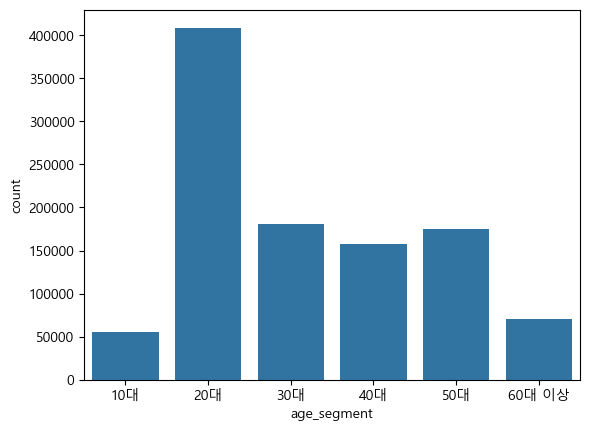

In [ ]:
age_order = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

age_cnt = df_clean['age_segment'].value_counts().reindex(age_order)
age_pct = (age_cnt / age_cnt.sum() * 100).round(1)

df_clean['age_segment'] = pd.Categorical(
    df_clean['age_segment'],
    categories=age_order,
    ordered=True
)

ax = sns.countplot(
    x='age_segment',
    data=df_clean,
    order=df_clean['age_segment'].cat.categories,
    hue='age_segment',
    palette='pastel',
    legend=False
)

# 막대 위에 비율 표시
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:
        pct = age_pct.iloc[i]
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{pct}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.title('고객 기본 구조 (연령대별 비율)', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
